# Descrição do Experimento

Algoritmo Genético utilizando representação binária do cromossomo. O valor zero representa que o vértice não participa da solução e o valor um, por outro lado, participa.

O tamanho do cromossomo é igual ao número de vértices não obrigatórios da instância do problema considerada (dataset), ou seja, é igual o número total de vértices subtraido a quantidade de vértices terminais.

Operação de cruzamento baseada em dois pontos de corte escolhidos aleatoriamente para cada chamada do método.
Foi utilizada a operação de mutação *bit flip*.

Para todas as instâncias do problema foram utilizados os parâmetros:

    - Nro. de execuções = 5
    - Tamanho população = 10
    - Nro máximo de iterações = 10.000
    - Taxa de cruzamento = 0.85
    - Taxa de mutação = 0.2
    - Critério de parada: atingir o número máximo de iterações.
    
    - A inicialização da população aleatória com inserção de cromossomo com todos os valores genes iguais a 1*.
    
Todos os valores iguais a um equivale a MST do grafo que serve de instância do problema.

O código da simulação pode ser obtido no seguinte [*commit*](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/tree/df8b69b207c824aefa6c4e603ebb9e83b12903e4)

As instâncias consideradas se referem aos da classe B (steinb1.txt ... steinb18.txt) da OR-Library.

## Conclusão

Os ótimos globais para cada instância do problema foi atingido, o que confirma os resultados relatados no artigo de referência (Kapsalis, 1993) e sugere que a implementação esteja de acordo.

O AG não encontrou o ótimo global para todas as execuções para as instâncias 
B11, B14, B15, B16 e B18. 

In [1]:
# CONFIGURAÇÕES INICIAIS DO NOTEBOOK
import os

# Importando bibliotecas para análise de dados
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Diretórios contendo os arquivos de dados 
MAIN_FOLDER = os.path.join("..", "outputdata", "KAPSALIS_MST")

DATA_FOLDERS = [f'B{i}' for i in range(1,19)]

os.path.exists(MAIN_FOLDER)

True

In [3]:
## Leitura dos arquivos (de diretório especifíco)

# base_filename = 'simulation.csv'
# datafolder = DATA_FOLDERS[16]

# DATA = list()

# for i in range(1,6):
#     filename = os.path.join(MAIN_FOLDER,
#                             datafolder ,
#                             f'{i}_{base_filename}')
#     print(filename)
#     DATA.append(pd.read_csv(filename))


# dfData = pd.concat(DATA, ignore_index=True)

In [4]:
## Leitura dos arquivos de dados (de todos os diretórios)

base_filename = 'simulation.csv'
datafolder = DATA_FOLDERS[0]

DATA = list()
for datafolder in DATA_FOLDERS:
    for i in range(1,6):
        filename = os.path.join(MAIN_FOLDER,
                                datafolder ,
                                f'{i}_{base_filename}')
#         print(filename)
        DATA.append(pd.read_csv(filename))

dfData = pd.concat(DATA, ignore_index=True)

In [5]:
dfData.head()

,trial,instance_Problem,nro_nodes,nro_edges,nro_terminals,tx_crossover,tx_mutation,best_cost,best_fitness,population_size,generation
0,1,B1,50,63,9,0.85,0.2,82,99,10,10000
1,2,B1,50,63,9,0.85,0.2,82,102,10,10000
2,3,B1,50,63,9,0.85,0.2,82,91,10,10000
3,4,B1,50,63,9,0.85,0.2,82,15,10,10000
4,5,B1,50,63,9,0.85,0.2,82,91,10,10000


In [6]:
# fig = plt.figure(figsize=(20, 10))

# sns.boxplot(x="best_cost", 
#             y="instance_Problem",
#             data=dfData,
#             palette="vlag",
#            )

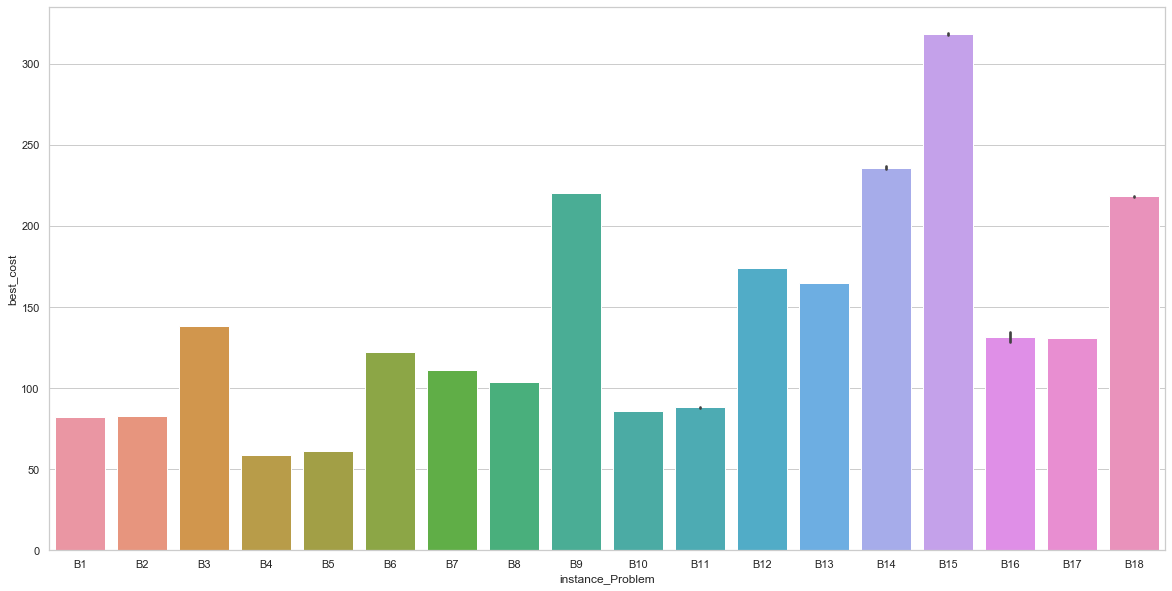

In [7]:
## Gráfico de Barras
## Resultados encontrados para cada instância.

fig = plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

sns.barplot(x="instance_Problem",
            y="best_cost",
            data=dfData,
           )

In [8]:
df = dfData[['instance_Problem', 'best_cost']].groupby(['instance_Problem']).describe()

df

best_cost                                                    
                     count   mean       std    min    25%    50%    75%    max
instance_Problem                                                              
B1                     5.0   82.0  0.000000   82.0   82.0   82.0   82.0   82.0
B10                    5.0   86.0  0.000000   86.0   86.0   86.0   86.0   86.0
B11                    5.0   88.2  0.447214   88.0   88.0   88.0   88.0   89.0
B12                    5.0  174.0  0.000000  174.0  174.0  174.0  174.0  174.0
B13                    5.0  165.0  0.000000  165.0  165.0  165.0  165.0  165.0
B14                    5.0  236.0  1.224745  235.0  235.0  236.0  236.0  238.0
B15                    5.0  318.4  0.894427  318.0  318.0  318.0  318.0  320.0
B16                    5.0  131.6  4.037326  127.0  128.0  132.0  135.0  136.0
B17                    5.0  131.0  0.000000  131.0  131.0  131.0  131.0  131.0
B18                    5.0  218.2  0.447214  218.0  218.0  218.0  218.0  219.0
B2                     5.0   83.0  0.000000   83.0   83.0   83.0   83.0   83.0
B3                     5.0  138.0  0.000000  138.0  138.0  138.0  138.0  138.0
B4                     5.0   59.0  0.000000   59.0   59.0   59.0   59.0   59.0
B5                     5.0   61.0  0.000000   61.0   61.0   61.0   61.0   61.0
B6                     5.0  122.0  0.000000  122.0  122.0  122.0  122.0  122.0
B7                     5.0  111.0  0.000000  111.0  111.0  111.0  111.0  111.0
B8                     5.0  104.0  0.000000  104.0  104.0  104.0  104.0  104.0
B9                     5.0  220.0  0.000000  220.0  220.0  220.0  220.0  220.0

In [9]:

dfData['count'] = 0
df = dfData[['instance_Problem', 'best_cost', 'count']].groupby(['instance_Problem', 'best_cost']).count()

df['prop'] = (df['count'] / 5) * 100

df

count   prop
instance_Problem best_cost              
B1               82             5  100.0
B10              86             5  100.0
B11              88             4   80.0
                 89             1   20.0
B12              174            5  100.0
B13              165            5  100.0
B14              235            2   40.0
                 236            2   40.0
                 238            1   20.0
B15              318            4   80.0
                 320            1   20.0
B16              127            1   20.0
                 128            1   20.0
                 132            1   20.0
                 135            1   20.0
                 136            1   20.0
B17              131            5  100.0
B18              218            4   80.0
                 219            1   20.0
B2               83             5  100.0
B3               138            5  100.0
B4               59             5  100.0
B5               61             5  100.0
B6               122            5  100.0
B7               111            5  100.0
B8               104            5  100.0
B9               220            5  100.0

In [10]:
# df.to_clipboard()